# Aula 03 - K-nearest neighbors (KNN)

Agora começaremos a explorar nosso primeiro modelo de Machine Learning propriamente dito: o KNN! Nesta aula, iremos enfocar uma aplicação de classificação e, na aula seguinte, falaremos sobre sua aplicação à regressão.

<img src="https://www.researchgate.net/profile/Mohammed-Badawy/publication/331424423/figure/fig1/AS:732056359297024@1551547245072/Example-on-KNN-classifier.png" width=600>

###  

## K-Nearest Neighbors ou K-Vizinhos

O modelo K-Nearest Neighbors (KNN), ou K-Vizinhos, é um modelo de classificação bem simples, cuja ideia de aplicação é: iremos definir se um dado pertence ou não a uma classe - ou no caso multi classes para qual das classes irá pertencer -, a partir de cálculos de **distâncias!** <br><br>

A cada observação nova que devemos classificar, será feito o cálculo de distância das $K$ observações mais próximas em relação ao elemento a ser classificado e, de acordo com a classificação desses vizinhos próximos, será definida a classe da observação: 

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width=600>

É importante ressaltar que o modelo KNN é **bem simples** de rodar e tem um **custo computacional mais baixo** em relação a outros modelos. Entretanto, **ele não aprende** com os dados já observados, ou seja: toda vez que tivermos novos dados, serão calculadas todas as ditâncias para definir os elementos mais próximos e, assim, conseguir classificá-lo.<br><br>

Existem vários tipos de distâncias que podemos utilizar no KNN; por exemplo: [Euclidiana](https://en.wikipedia.org/wiki/Euclidean_distance), [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance), [Cosseno](https://cmry.github.io/notes/euclidean-v-cosine) e [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).<br><br>

A distância Euclidiana é a que geralmente estamos mais habituados; é aquela a qual costumamos atribuir o sentido de "distância em linha reta". A figura abaixo ilustra o cálculo para a distância Euclidiana entre dois pontos quaisquer em um espaço x-y (podemos pensar nesses pontos, por exemplo, como correspondendo a duas observações distintas de um vetor de atributos).

<img src="https://rosalind.info/media/Euclidean_distance.png" width=300>

Em suma, o processo de modelagem para o KNN engloba usualmente as seguintes etapas:

1. Recebe um dado não classificado;
2. Mede sua distância (Euclidiana, Manhattan, Minkowski ou Ponderada) a cada um dos elementos da base de treino;
3. Obtém um *ranking* das distâncias, em ordem decrescente;
4. Verifica a classe de cada uma das *K* observações que tiveram a menor distância, e conta a quantidade correspondente a cada classe;
5. Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
6. Classifica o novo dado com a classe tomada como resultado da classificação.

Mas sempre que olhamos para o nosso processo de modelagem (como o exemplo acima), a primeira dúvida que vem na cabeça é:

> Qual é o número de vizinhos adequados: i.e., **como escolher $k$?**

Essa é uma escolha particularmente importante, pois escolhas diferentes de $k$ podem facilmente levar a classificações diferentes:

<img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" width=400>

Abaixo temos uma animação de como o método funciona:

<img src = "https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif" width = 600>

[Esta referência](https://machinelearningknowledge.ai/k-nearest-neighbor-classification-simple-explanation-beginners/) tem algumas boas animações que podem ser úteis para ajudar a entender o passo a passo do método!

### Exemplo com um dataset fictício

Vamos trabalhar com um conjunto de dados simulado, com 300 observações divididas em três classes de dados, e uma matriz de atributos bidimensional (i.e., dois atributos).

In [1]:
import sklearn.datasets as skdata

n_exemplos = 300
centroides = [(-2,2), (0,2), (0,-1)]

In [43]:
X, y = skdata.make_blobs(n_samples = n_exemplos,
                        n_features = 2,
                        cluster_std = 0.8,
                        centers = centroides,
                        shuffle = False,
                        random_state = 5)

In [3]:
X

array([[-1.64701801,  1.73530388],
       [-0.05538305,  1.7983263 ],
       [-1.91231213,  3.26598489],
       [-2.72738592,  1.52669067],
       [-1.84991742,  1.73610403],
       [-2.95421169,  1.83609879],
       [-2.28706316,  2.48277728],
       [-3.33183082,  1.43985677],
       [-1.07888719,  3.48586481],
       [-3.20894365,  2.51587801],
       [-2.78448631,  1.31451748],
       [-2.69750335,  1.66199366],
       [-1.20284814,  2.56993702],
       [-1.95268461,  1.7093513 ],
       [-1.99736893,  1.91525565],
       [-1.36555734,  1.4947427 ],
       [-2.00495593,  1.91914591],
       [-2.04184652,  2.19937413],
       [-1.84187193,  3.06787886],
       [-2.06950049,  3.24922583],
       [-2.24468242,  1.61781487],
       [-1.91940945,  2.28435078],
       [-1.78431007,  3.03357071],
       [-1.08852562,  2.39555232],
       [-2.26906901,  1.91950852],
       [-0.86928159,  2.1770033 ],
       [-3.04861851,  1.44834781],
       [-2.46201059,  2.92176382],
       [-2.08573119,

In [4]:
X.shape

(300, 2)

Text(0, 0.5, 'X2')

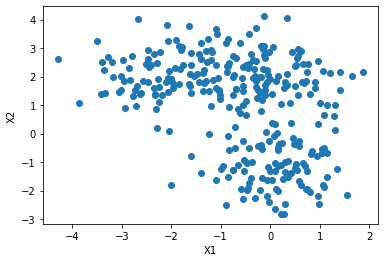

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X1")
plt.ylabel("X2")

Verifiquemos os labels atribuídos em 'y' e o número de observações em cada classe.

In [11]:
set(y) # temos 3 classes de dados

{0, 1, 2}

In [13]:
import pandas as pd

In [17]:
df = pd.DataFrame(X, columns = ["X1", "X2"])
df["y"] = y
df

,X1,X2,y
0,-1.647018,1.735304,0
1,-0.055383,1.798326,0
2,-1.912312,3.265985,0
3,-2.727386,1.526691,0
4,-1.849917,1.736104,0
...,...,...,...
295,-1.390337,-1.373185,2
296,-2.007388,-1.816818,2
297,-0.375847,-1.006207,2
298,-0.431888,-1.739550,2


<AxesSubplot: xlabel='X1', ylabel='X2'>

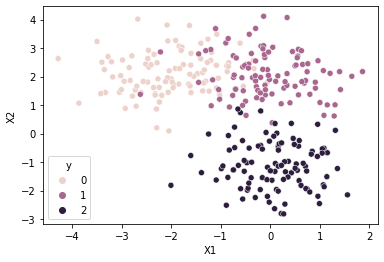

In [18]:
import seaborn as sns
sns.scatterplot(data = df,
               x = "X1",
               y = "X2",
               hue = "y")

Agora, vamos utilizar o algoritmo do KNN para visualizar **curvas de decisão** entre as três classes de dados. Estas curvas nos indicarão a que classe de dados uma nova amostra pertence, a partir de sua posição no espaço de fase gerado pelos atributos X1 e X2.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')

model.fit(X, y) # ainda não separei treino e teste

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: xlabel='X1', ylabel='X2'>

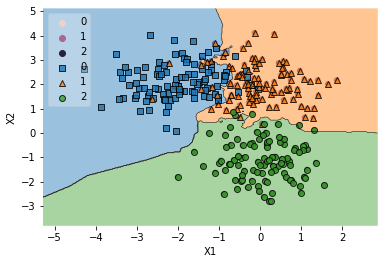

In [44]:
sns.scatterplot(data = df,
               x = "X1",
               y = "X2",
               hue = "y")
plot_decision_regions(X, y, clf = model, legend = 2)

Experimente variar o "k" e ver como se comportam as fronteiras de decisão!

## Exemplo Prático

Passemos, agora, a um dataset contendo características para identificar câncer de mama.

In [47]:
df = pd.read_csv("breast_cancer.csv")

#### Lendo conjunto de dados

Como exemplo, vamos utilizar dados de Câncer de Mama, esses dados estão disponiveis também no [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) ou pelo site do [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). 

A ideia é que consigamos construir um modelo classificador entre câncer maligno e benigno.

In [48]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
df.shape

(569, 32)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
df.drop(columns = "id", inplace = True)

In [52]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Análise exploratória

<AxesSubplot: >

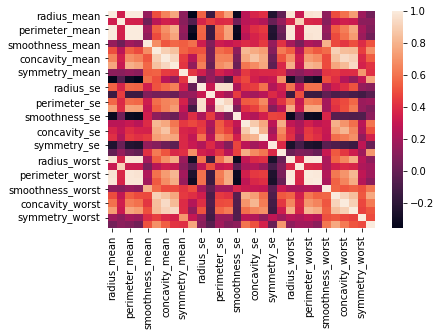

In [54]:
sns.heatmap(df.corr(method = 'spearman', numeric_only = True))

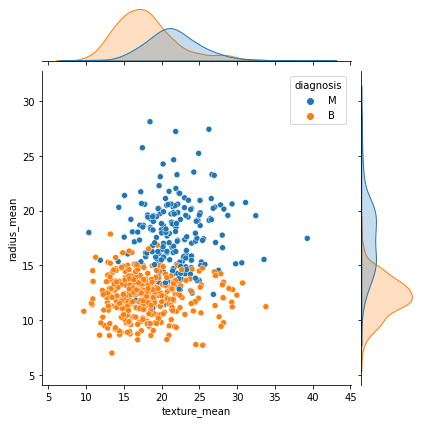

In [56]:
sns.jointplot(data = df,
             x = "texture_mean",
             y = "radius_mean",
             hue = "diagnosis")

Uma pergunta é muitíssimo importante:

In [57]:
df["diagnosis"].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

C:\Users\cstefano\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

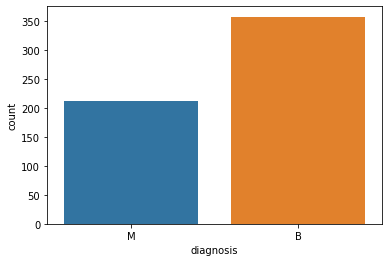

In [58]:
sns.countplot(df["diagnosis"])

Apesar de termos dados desbalanceados, neste caso, não temos uma única classe muito redominante (>80-90% dos dados), de modo que o desbalanceamento não é um grande agravante. Então continuaremos a usar os dados sem grandes tratamentos, mas no percorrer do curso aprenderemos algumas técnicas para lidar com dados desbalanceados.

In [59]:
# separando as features (X) e o target (y)
X = df.drop(columns = "diagnosis")
y = df["diagnosis"]

In [65]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y)

In [66]:
y_train.value_counts(normalize = True)

B    0.628141
M    0.371859
Name: diagnosis, dtype: float64

In [67]:
y_test.value_counts(normalize = True)

B    0.625731
M    0.374269
Name: diagnosis, dtype: float64

In [68]:
y.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [70]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot: xlabel='compactness_mean', ylabel='radius_mean'>

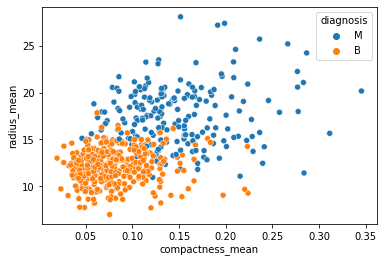

In [71]:
# observe a diferença de escala
sns.scatterplot(data = df,
               x = "compactness_mean",
               y = "radius_mean",
               hue = "diagnosis")

#### Transformações dos Dados

Em alguns modelos de classificação, principalmente em modelos baseados em distâncias, é **sempre importante transformarmos nossos dados para escalas parecidas**. Isso é necessário pois dependendo da ordem de grandeza de cada um das variáveis isso pode influenciar nos cálculos do nosso modelo. As transformações mais comuns são [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) e [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler). Vamos utilizar o _StandardScaler_ a seguir.

A ideia da normalização do *StandardScaler* é subtrair, de cada observação, a média da distribuição, e dividir pelo desvio-padrão:

$z = \frac{x - \mu}{\sigma}$.

Isso *normaliza* a distribuição dos dados no sentido de torná-la uma normal com média 0 e desvio-padrão unitário: N(0,1). Isso faz com que as distribuições fiquem mais diretamente comparáveis entre si.

<img src="https://miro.medium.com/max/992/1*dZlwWGNhFco5bmpfwYyLCQ.png" width=500>

Já o *MinMaxScaler* normaliza os valores para que o resultado fique compreendido, por padrão, no intervalo [0,1] (este intervalo pode ser especificado como entrada da função), conforme ilustrado na figura abaixo. Neste caso, a normalização que fazemos é:

$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}.$

<img src="https://sofapirate.github.io/Plaquette/_images/Plaquette-MinMaxScaler.png" width=500>

#### Exemplo do processo com números quaisquer

In [72]:
data = [[60, 2], [40, 2], [50, 4], [80, 2]]
a = np.array(data)

In [73]:
a

array([[60,  2],
       [40,  2],
       [50,  4],
       [80,  2]])

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # instancio a classe
scaler.fit(data) # fit nos dados

StandardScaler()

In [75]:
scaler.transform(a)

array([[ 0.16903085, -0.57735027],
       [-1.18321596, -0.57735027],
       [-0.50709255,  1.73205081],
       [ 1.52127766, -0.57735027]])

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # instancio a classe
scaler.fit(data) # fit nos dados

MinMaxScaler()

In [77]:
scaler.transform(a)

array([[0.5 , 0.  ],
       [0.  , 0.  ],
       [0.25, 1.  ],
       [1.  , 0.  ]])

#### Continuando com o *scaling* dos nossos dados:

In [79]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
532,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,0.06155,...,15.85,20.20,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782
341,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,0.2036,0.07125,...,10.75,23.07,71.25,353.6,0.1233,0.3416,0.4341,0.08120,0.2982,0.09825
562,15.220,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.23560,0.4089,0.14090
499,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420


In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # já faz o fit e transforma o dado
# equivalente a X_train_scaled = (X_train - X_train.min())/(X_train.max() - X_train.min()), se não usamos o Scaler

# seria equivalente a
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)

<AxesSubplot: xlabel='radius_mean', ylabel='Count'>

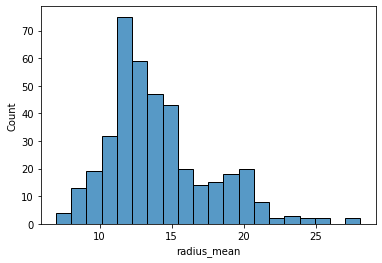

In [85]:
sns.histplot(X_train.iloc[:,0])

<AxesSubplot: ylabel='Count'>

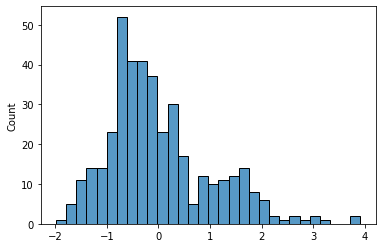

In [89]:
sns.histplot(X_train_scaled[:, 0], bins = 30)

In [90]:
# O mesmo objeto "scaler" é usado para os dados de teste (não faz o fit novamente!)
X_test_scaled = scaler.transform(X_test)

# equivalente a X_test_scaled = (X_test - X_train.mean())/(X_train.std()), se não usamos o Scaler

Agora vamos para o nosso processo padrão de instância, fit e predict para o modelo:<br>
Deixarei o link do Scikit-Learn para [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [91]:
from sklearn.neighbors import KNeighborsClassifier # importando o KNN classificador

In [92]:
# Faça a chamada do modelo
model = KNeighborsClassifier(n_neighbors = 5)

In [93]:
model

KNeighborsClassifier()

In [94]:
# Fit do modelo (treinamento)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [95]:
# Predições do modelo
y_pred = model.predict(X_test_scaled)
y_pred

array(['B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B'], dtype=object)

In [96]:
pd.Series(y_pred).value_counts(normalize = True)

B    0.666667
M    0.333333
dtype: float64

In [121]:
df_results = pd.concat([y_test.reset_index(), pd.Series(y_pred)], axis = 1).drop(columns = "index").rename(columns = 
                                                                                              {"diagnosis": "Actual",
                                                                                              0: "Predicted"})

In [122]:
df_results["Actual"] = df_results["Actual"].apply(lambda x: 1 if x == "M" else 0)
df_results["Predicted"] = df_results["Predicted"].apply(lambda x: 1 if x == "M" else 0)

In [124]:
abs(df_results["Actual"] - df_results["Predicted"]).sum()/df_results.shape[0]

0.04093567251461988

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

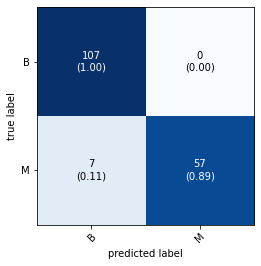

In [128]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm, show_normed = True, class_names = ["B", "M"])

In [126]:
cm

array([[107,   0],
       [  7,  57]], dtype=int64)

### Definindo o valor de K vizinhos

No exemplo acima, elaboramos o classificador utilizando os 5 vizinhos mais próximos a cada observação. Mas e se quiséssemos tentar otimizar esta escolha? Como poderíamos fazer?

Utilizando **validação cruzada**, vamos criar um looping e fazer uma varredura nos valor de K, para encontramos seu valor ideal.

In [129]:
X_train.shape

(398, 30)

___

### Validação cruzada

**Atenção:** embora estejamos utilizando a escolha de K como um *motivador* do estudo da validação cruzada, esta abordagem é **genérica**, podendo ser estendida ao treinamento de qualquer tipo de modelo!

O cross validation (CV) é uma das técnicas mais importantes no ferramental de um cientista de dados.

Operacionalmente, o CV implementa diferentes conjuntos de treino e teste (aqui chamados de **validação**), criando efetivamente diferentes modelos treinados e avaliados em diferentes suconjuntos aleatórios (os chamados **folds**) da base de dados original. 

No fim, é possível inspecionar as métricas de interesse em cada fold, bem como ter uma ideia da performance média do modelo, olhando para **a distribuição das métricas de avaliação**.

Note que este procedimento está intimamente relacionado com a avaliação da desejável habilidade de **generalização do modelo**!

A forma mais comum de fazermos CV é através da técnica **k-fold**:

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500>

No extremo desta abordagem, podemos tomar o número $k$ de folds igual ao número de observações na base ($n$). Neste caso, utiliza-se **uma única** observação para teste, enquanto o resto do dataset é utilizado para treino. Essa abordagem é conhecida como **leave one out (LOO)**:

<img src=https://assets.datacamp.com/production/repositories/3981/datasets/8a6236f142b1ee2e4a70aae2af9507c7c580f302/Screen%20Shot%202019-01-27%20at%209.25.41%20AM.png width=500>

Note que o esforço computacional aumenta conforme $k$ aumenta, sendo máximo quando $k=n$. Por esse motivo, recomenda-se usar o LOO apenas nos casos em que o número de observções na base original é bem pequeno ($\sim 10^2$).

Vamos implementar o procedimento de CV utilizando o sklearn!

No [submódulo model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), temos duas ferramentas muito importantes para o processo de CV:

- [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold): classe que cria os folds. Obs.: para fazer o LOO, basta colocar $k=n$ folds, ou então usar diretamente a classe que implementa o [LOO](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut);

- [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate): função que recebe os folds e os utiliza para o treinamento e avaliação cruzada de modelos, segundo a métrica definida.

Para ilustrar o CV, vamos aplicá-lo ao nosso problema da escolha de K!

___

#### Voltando ao nosso dataset...

In [130]:
yy = y_train == 'M'
y_train = yy.astype(int)
y_train

532    0
341    0
562    1
499    1
17     1
      ..
419    0
143    0
51     0
252    1
213    1
Name: diagnosis, Length: 398, dtype: int32

In [131]:
from sklearn.model_selection import KFold, cross_validate

In [132]:
kf5 = KFold(n_splits = 5, shuffle = True, random_state = 5)
kf5

KFold(n_splits=5, random_state=5, shuffle=True)

In [135]:
knn = KNeighborsClassifier(n_neighbors = 5)
    
# Criando os folds da validação cruzada
kf5 = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [136]:
    # scores da validação-cruzada
cv_scores = cross_validate(estimator = knn,
                              scoring = 'neg_mean_absolute_error',
                              X = X_train_scaled,
                              y = y_train,
                              cv = kf5,
                              return_train_score = True)

In [138]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,0.002008,0.006132,-0.025000,-0.022013
1,0.000998,0.002991,-0.025000,-0.022013
2,0.000997,0.003989,-0.000000,-0.028302
3,0.000997,0.002991,-0.063291,-0.015674
4,0.001992,0.002992,-0.050633,-0.012539


<AxesSubplot: >

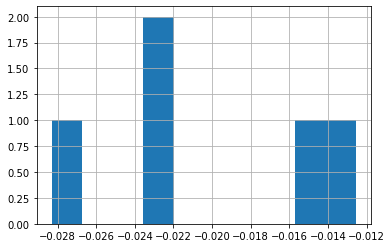

In [140]:
pd.DataFrame(cv_scores)["train_score"].hist()

In [147]:
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

training_error = []
validation_error = []

for k in k_list:
    # Criar um novo classificador KNN com "k" vizinhos
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # Criando os folds da validação cruzada
    kf5 = KFold(n_splits = 5, shuffle = True, random_state = 5)
    
    # scores da validação-cruzada
    cv_scores = cross_validate(estimator = knn,
                              scoring = 'neg_mean_absolute_error',
                              X = X_train_scaled,
                              y = y_train,
                              cv = kf5,
                              return_train_score = True)
    
    training_error.append(np.mean(cv_scores["train_score"]))
    validation_error.append(np.mean(cv_scores["test_score"]))
    

In [143]:
training_error

[-0.01068393761952643,
 -0.02324875298199957,
 -0.020108042033871572,
 -0.030159105695865617,
 -0.032041955008773486,
 -0.03329784507403245,
 -0.03203998343881233,
 -0.03455176356933026,
 -0.03392480432168136,
 -0.03769444608741941]

In [144]:
validation_error

[-0.025221518987341773,
 -0.03531645569620253,
 -0.032784810126582284,
 -0.03781645569620253,
 -0.04031645569620253,
 -0.040348101265822785,
 -0.03784810126582279,
 -0.03781645569620253,
 -0.03781645569620253,
 -0.03781645569620253]

Text(0, 0.5, 'Erro')

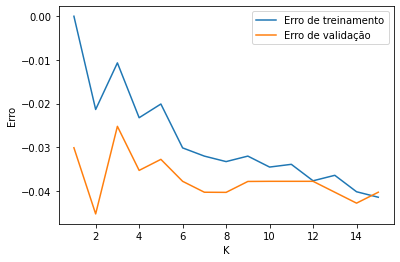

In [148]:
plt.plot(k_list, training_error)
plt.plot(k_list, validation_error)
plt.legend(["Erro de treinamento", "Erro de validação"])

plt.xlabel("K")
plt.ylabel("Erro")

In [156]:
# Vamos pegar, por exemplo, K = 3
KNN_final = KNeighborsClassifier(n_neighbors = 3)
KNN_final.fit(X_train_scaled, y_train)

y_pred = KNN_final.predict(X_test_scaled)

In [157]:
y_test_as_int = y_test == 'M'
y_test_as_int = y_test_as_int.astype(int)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

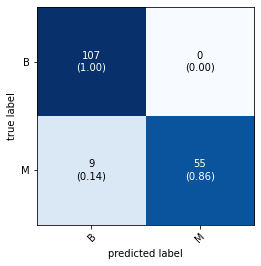

In [158]:
cm = confusion_matrix(y_test_as_int, y_pred)
plot_confusion_matrix(conf_mat = cm, show_normed = True, class_names = ["B", "M"])

### Exercicio
  
Utilizando a base de seguros, [*'insurance.csv'*](https://www.kaggle.com/datasets/simranjain17/insurance), responda aos exercícios propostos abaixo.

- __1)__ O dataset contém valores contínuos para a coluna *charges*, valor a ser cobrado pela seguradora. Como poderíamos definir valores discretos para enquadrar diferentes categorias de preço cobrado; por exemplo, definindo um valor a ser pago "baixo", "médio", ou "alto"? Siga sua proposta e adeque o dataset para que contenha um *target* neste formato, e imprima a proporção resultante de instâncias em cada classe.
- __2)__ Segmente o conjunto de dados em amostra de teste e treinamento, e defina o número ótimo de *k* para um classificador do tipo KNN que tente prever em qual das três classes definidas em (1) uma nova entrada será alocada. Não se esqueça de avaliar a necessidade de *scaling* dos dados.
- __3)__ Treine o modelo com o número ótimo de 'k' definido em (2), e obtenha o erro da predição.

#### Exercício 1

In [2]:
import pandas as pd
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot: xlabel='charges', ylabel='Count'>

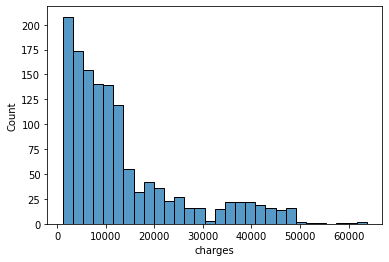

In [5]:
import seaborn as sns
sns.histplot(df["charges"])

In [6]:
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [7]:
import numpy as np

In [44]:
# Podemos tomar os valores de quartis como pontos de corte
# Ex: abaixo de 50 % (menor que a mediana) -> baixo
# 50 a 75 % -> médio
# acima de 75 % -> alto
df["charge_category"] = df["charges"].apply(lambda x: 0 if x < df["charges"].median()
                                          else 1 if x < np.quantile(df["charges"], 0.75)
                                           else 2
                                          )

In [45]:
df[["charges", "charge_category"]]

,charges,charge_category
0,16884.92400,2
1,1725.55230,0
2,4449.46200,0
3,21984.47061,2
4,3866.85520,0
...,...,...
1333,10600.54830,1
1334,2205.98080,0
1335,1629.83350,0
1336,2007.94500,0


In [46]:
df["charge_category"].value_counts(normalize = True)

0    0.500000
2    0.250374
1    0.249626
Name: charge_category, dtype: float64

#### Exercício 2

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charge_category
0,19,female,27.900,0,yes,southwest,16884.92400,alto
1,18,male,33.770,1,no,southeast,1725.55230,baixo
2,28,male,33.000,3,no,southeast,4449.46200,baixo
3,33,male,22.705,0,no,northwest,21984.47061,alto
4,32,male,28.880,0,no,northwest,3866.85520,baixo


In [18]:
# Tratando as features categóricas
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [47]:
# vamos usar a função "get_dummies" do pandas para o tratamento das variáveis categóricas
df2 = pd.get_dummies(df, columns = ["sex", "smoker", "region"])

In [20]:
df2.head()

,age,bmi,children,charges,charge_category,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,alto,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,baixo,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,baixo,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,alto,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,baixo,0,1,1,0,0,1,0,0


In [36]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [48]:
# Modelando o problema com o classificador KNN

# Divisão em treino e teste
X = df2.drop(columns = ["charges", "charge_category"])
y = df2["charge_category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y)

# Normalização/padronização dos dados
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do modelo
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [32]:
y_train.value_counts(normalize = True)

baixo    0.500000
alto     0.250467
médio    0.249533
Name: charge_category, dtype: float64

In [33]:
y_test.value_counts(normalize = True)

baixo    0.50
alto     0.25
médio    0.25
Name: charge_category, dtype: float64

In [79]:
# Otimizando o valor de k
k_list = np.arange(1,20)

training_error = []
validation_error = []

for k in k_list:
    # Criar um novo classificador KNN com "k" vizinhos
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # Criando os folds da validação cruzada
    kf5 = KFold(n_splits = 5, shuffle = True, random_state = 5)
    
    # scores da validação-cruzada
    cv_scores = cross_validate(estimator = knn,
                              scoring = 'neg_mean_absolute_error',
                              X = X_train_scaled,
                              y = y_train,
                              cv = kf5,
                              return_train_score = True)
    
    training_error.append(np.mean(cv_scores["train_score"]))
    validation_error.append(np.mean(cv_scores["test_score"]))
    

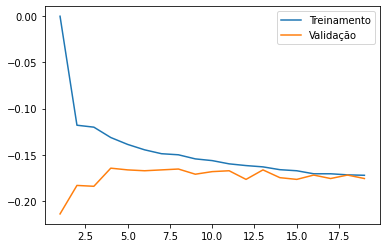

In [80]:
import matplotlib.pyplot as plt
plt.plot(k_list, training_error)
plt.plot(k_list, validation_error)
plt.legend(["Treinamento", "Validação"])

In [ ]:
# Vamos pegar, por exemplo, k = 13

Vamos escolher $k = 13$

#### Exercício 3

In [56]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 13) # valor de k escolhido no Exercício 2
KNN_classifier.fit(X_train_scaled, y_train) # treinamento do modelo
KNN_predictions = KNN_classifier.predict(X_test_scaled) # avaliação de performance

In [57]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [60]:
cm = confusion_matrix(y_test, KNN_predictions)

In [61]:
cm

array([[128,   6,   0],
       [ 11,  47,   9],
       [  9,   5,  53]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

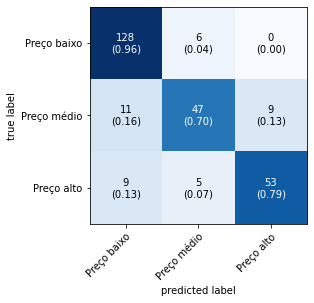

In [67]:
plot_confusion_matrix(conf_mat = cm, show_normed = True, class_names = ['Preço baixo', 'Preço médio', 'Preço alto'])

Podemos fazer uma média ponderada para representar nossa "acurácia ponderada":

$A_{média} = \frac{128*0.96 + 47*0.7 + 53*0.79}{128 + 47 + 53}$ = 86.7 %

In [68]:
(128*0.96 + 47*0.7 + 53*0.79)/(128+47+53)

0.8668859649122808

In [72]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {"n_neighbors": range(1,20)}

KNN = KNeighborsClassifier()

# grid search
grid_knn_class = GridSearchCV(estimator = KNN,
                              param_grid = param_grid,
                             scoring = 'neg_mean_absolute_error',
                             cv = kf5,
                             verbose = 10)
grid_knn_class.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5; 1/19] START n_neighbors=1..............................................
[CV 1/5; 1/19] END ..............n_neighbors=1;, score=-0.210 total time=   0.0s
[CV 2/5; 1/19] START n_neighbors=1..............................................
[CV 2/5; 1/19] END ..............n_neighbors=1;, score=-0.234 total time=   0.0s
[CV 3/5; 1/19] START n_neighbors=1..............................................
[CV 3/5; 1/19] END ..............n_neighbors=1;, score=-0.201 total time=   0.0s
[CV 4/5; 1/19] START n_neighbors=1..............................................
[CV 4/5; 1/19] END ..............n_neighbors=1;, score=-0.220 total time=   0.0s
[CV 5/5; 1/19] START n_neighbors=1..............................................
[CV 5/5; 1/19] END ..............n_neighbors=1;, score=-0.206 total time=   0.0s
[CV 1/5; 2/19] START n_neighbors=2..............................................
[CV 1/5; 2/19] END ..............n_neighbors=2;,

[CV 2/5; 13/19] END ............n_neighbors=13;, score=-0.192 total time=   0.0s
[CV 3/5; 13/19] START n_neighbors=13............................................
[CV 3/5; 13/19] END ............n_neighbors=13;, score=-0.150 total time=   0.0s
[CV 4/5; 13/19] START n_neighbors=13............................................
[CV 4/5; 13/19] END ............n_neighbors=13;, score=-0.145 total time=   0.0s
[CV 5/5; 13/19] START n_neighbors=13............................................
[CV 5/5; 13/19] END ............n_neighbors=13;, score=-0.164 total time=   0.0s
[CV 1/5; 14/19] START n_neighbors=14............................................
[CV 1/5; 14/19] END ............n_neighbors=14;, score=-0.178 total time=   0.0s
[CV 2/5; 14/19] START n_neighbors=14............................................
[CV 2/5; 14/19] END ............n_neighbors=14;, score=-0.192 total time=   0.0s
[CV 3/5; 14/19] START n_neighbors=14............................................
[CV 3/5; 14/19] END ........

GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)},
             scoring='neg_mean_absolute_error', verbose=10)

In [78]:
grid_knn_class.best_params_

{'n_neighbors': 4}